# Explore here

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_squared_error





url = "https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv"
df = pd.read_csv(url)

df.head()


,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [52]:
df.shape

(3140, 108)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [54]:
duplicados = df.duplicated()
print(f"Número de filas duplicadas: {duplicados.sum()}")


duplicated_rows = df[duplicados]
print(duplicated_rows.head())

Número de filas duplicadas: 0
Empty DataFrame
Columns: [fips, TOT_POP, 0-9, 0-9 y/o % of total pop, 19-Oct, 10-19 y/o % of total pop, 20-29, 20-29 y/o % of total pop, 30-39, 30-39 y/o % of total pop, 40-49, 40-49 y/o % of total pop, 50-59, 50-59 y/o % of total pop, 60-69, 60-69 y/o % of total pop, 70-79, 70-79 y/o % of total pop, 80+, 80+ y/o % of total pop, White-alone pop, % White-alone, Black-alone pop, % Black-alone, Native American/American Indian-alone pop, % NA/AI-alone, Asian-alone pop, % Asian-alone, Hawaiian/Pacific Islander-alone pop, % Hawaiian/PI-alone, Two or more races pop, % Two or more races, POP_ESTIMATE_2018, N_POP_CHG_2018, GQ_ESTIMATES_2018, R_birth_2018, R_death_2018, R_NATURAL_INC_2018, R_INTERNATIONAL_MIG_2018, R_DOMESTIC_MIG_2018, R_NET_MIG_2018, Less than a high school diploma 2014-18, High school diploma only 2014-18, Some college or associate's degree 2014-18, Bachelor's degree or higher 2014-18, Percent of adults with less than a high school diploma 2014-18

In [55]:
valores_nulos = df.isnull().sum()


print(valores_nulos[valores_nulos > 0])

Series([], dtype: int64)


In [56]:
df.isnull().sum()

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64

In [57]:
[df.columns[i] for i in range(len(df.columns)) if "diab" in df.columns[i].lower()]


['diabetes_prevalence',
 'diabetes_Lower 95% CI',
 'diabetes_Upper 95% CI',
 'diabetes_number']

In [58]:
target = 'diabetes_prevalence' #(principal objetivo)


exclude = ['diabetes_prevalence', 'diabetes_Lower 95% CI', 'diabetes_Upper 95% CI', 'diabetes_number']


numeric_df = df.select_dtypes(include=[np.number]).drop(columns=exclude)


correlations = numeric_df.corrwith(df[target]).sort_values(key=abs, ascending=False)


top_10_features = correlations.head(10)
print(top_10_features)


CKD_Lower 95% CI              0.924630
CKD_prevalence                0.918514
CKD_Upper 95% CI              0.906711
anycondition_Lower 95% CI     0.856473
Heart disease_Lower 95% CI    0.855832
anycondition_prevalence       0.850219
anycondition_Upper 95% CI     0.842287
PCTPOV017_2018                0.840088
PCTPOV517_2018                0.833527
Heart disease_prevalence      0.831021
dtype: float64


In [59]:
selected_columns = top_10_features.index.tolist() + [target]
df_model = df[selected_columns]


In [60]:
df_model.head()

,CKD_Lower 95% CI,CKD_prevalence,CKD_Upper 95% CI,anycondition_Lower 95% CI,Heart disease_Lower 95% CI,anycondition_prevalence,anycondition_Upper 95% CI,PCTPOV017_2018,PCTPOV517_2018,Heart disease_prevalence,diabetes_prevalence
0,2.9,3.1,3.3,45.4,7.2,47.6,49.4,19.3,19.5,7.9,12.9
1,3.0,3.2,3.5,38.2,7.0,40.2,42.3,13.9,13.1,7.8,12.0
2,4.2,4.5,4.8,55.6,10.1,57.5,59.1,43.9,36.7,11.0,19.7
3,3.1,3.3,3.6,49.6,7.9,51.6,53.4,27.8,26.3,8.6,14.1
4,3.2,3.4,3.7,44.3,8.4,46.3,48.4,18.0,15.5,9.2,13.5


In [61]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CKD_Lower 95% CI            3140 non-null   float64
 1   CKD_prevalence              3140 non-null   float64
 2   CKD_Upper 95% CI            3140 non-null   float64
 3   anycondition_Lower 95% CI   3140 non-null   float64
 4   Heart disease_Lower 95% CI  3140 non-null   float64
 5   anycondition_prevalence     3140 non-null   float64
 6   anycondition_Upper 95% CI   3140 non-null   float64
 7   PCTPOV017_2018              3140 non-null   float64
 8   PCTPOV517_2018              3140 non-null   float64
 9   Heart disease_prevalence    3140 non-null   float64
 10  diabetes_prevalence         3140 non-null   float64
dtypes: float64(11)
memory usage: 270.0 KB


variables numericas 

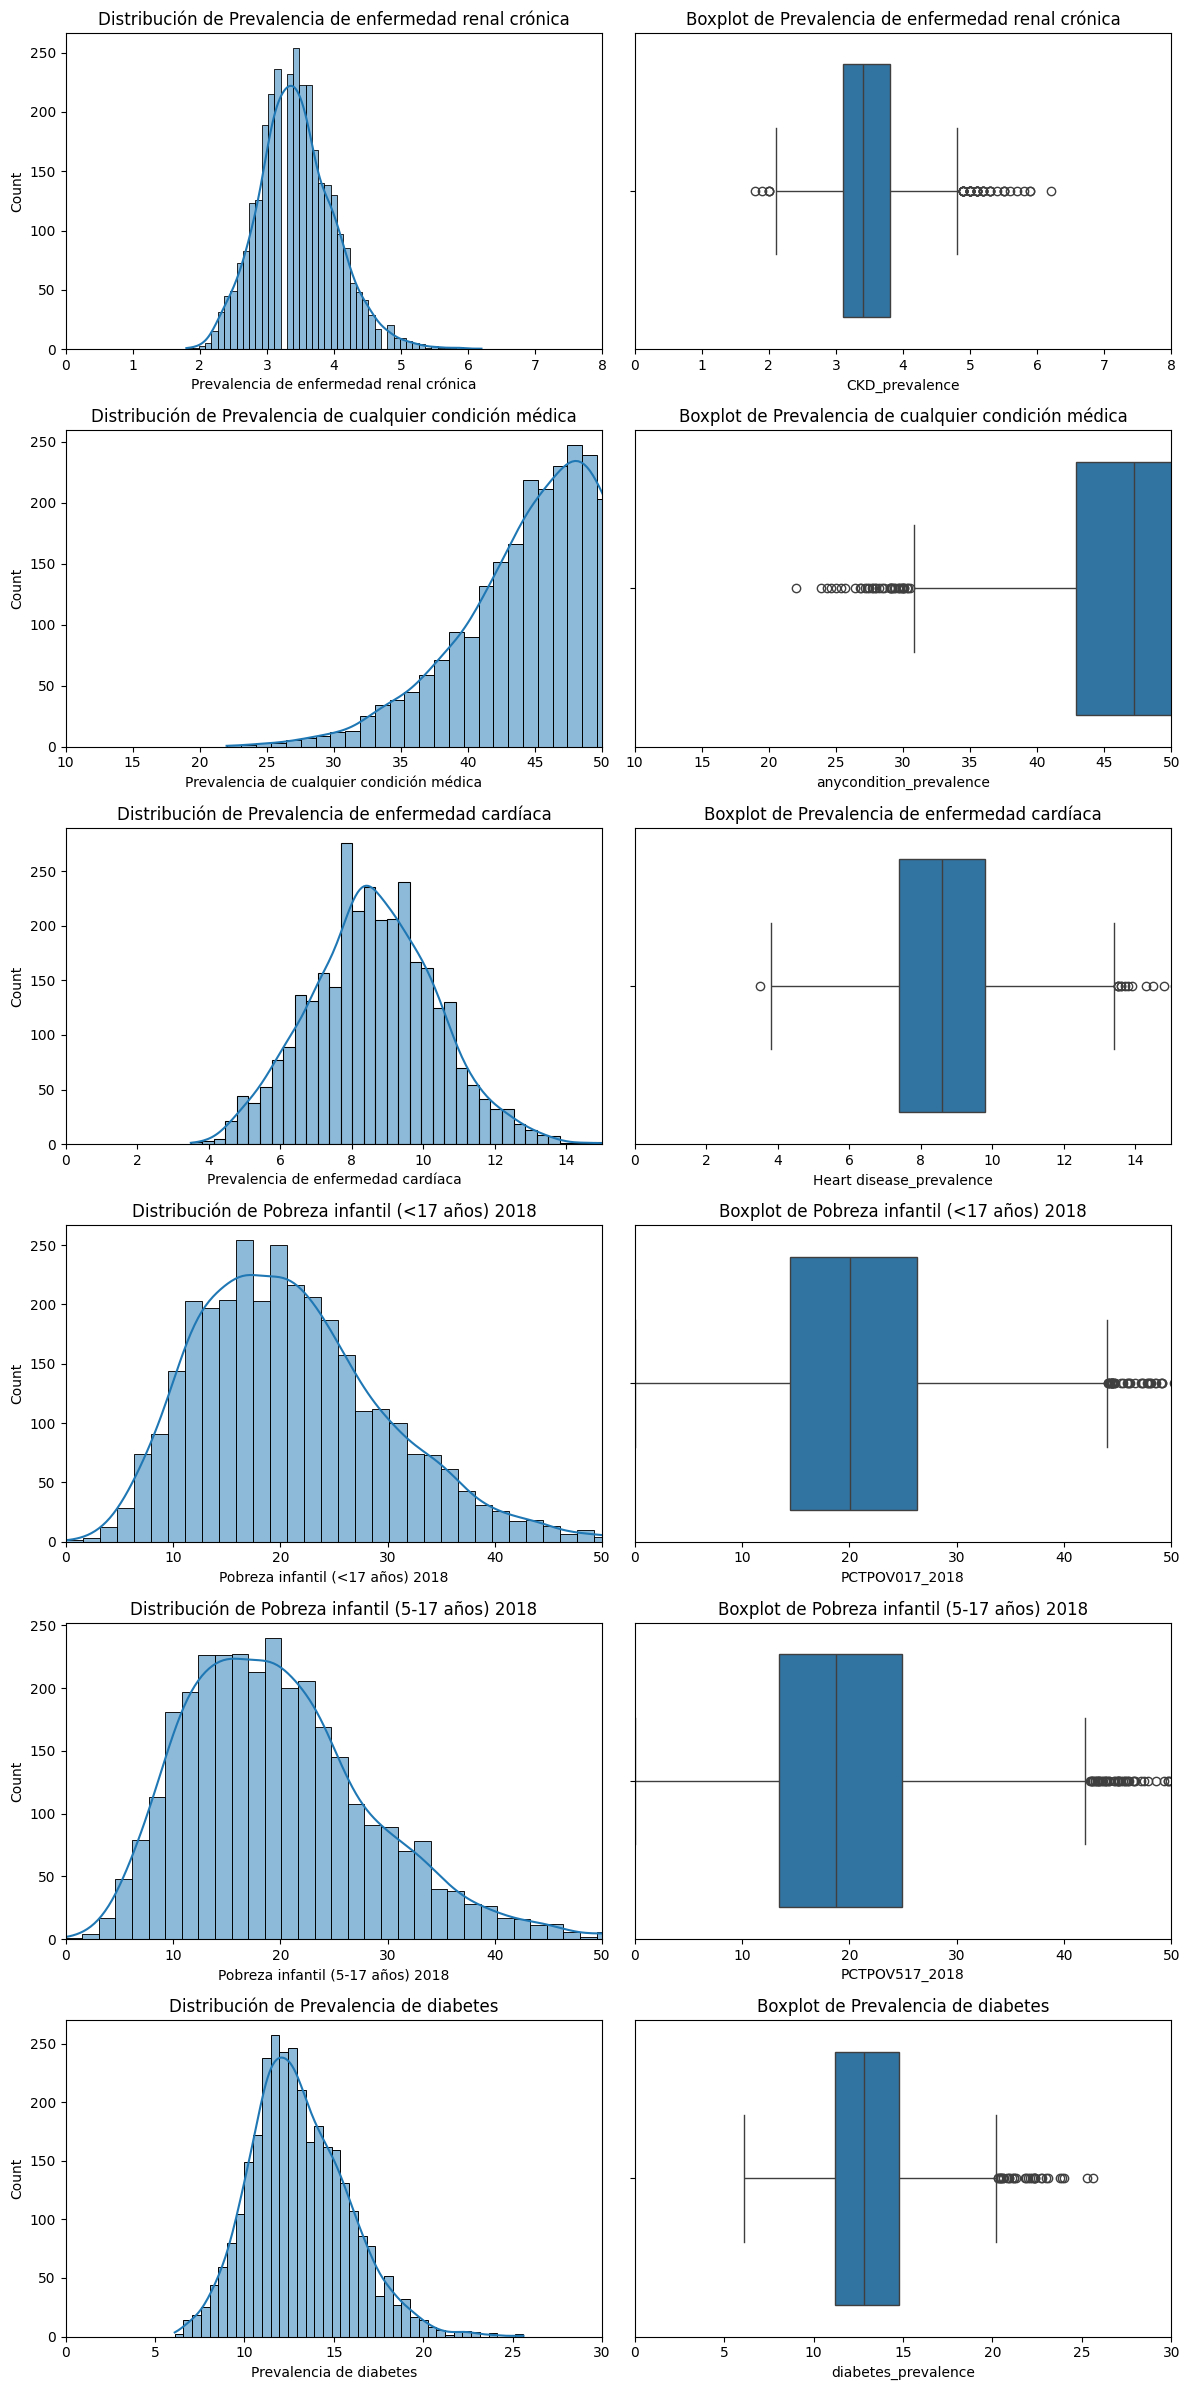

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns


numerical_columns = [
    'CKD_prevalence', 
    'anycondition_prevalence', 
    'Heart disease_prevalence', 
    'PCTPOV017_2018', 
    'PCTPOV517_2018', 
    'diabetes_prevalence'
]


column_names_es = {
    'CKD_prevalence': 'Prevalencia de enfermedad renal crónica',
    'anycondition_prevalence': 'Prevalencia de cualquier condición médica',
    'Heart disease_prevalence': 'Prevalencia de enfermedad cardíaca',
    'PCTPOV017_2018': 'Pobreza infantil (<17 años) 2018',
    'PCTPOV517_2018': 'Pobreza infantil (5-17 años) 2018',
    'diabetes_prevalence': 'Prevalencia de diabetes'
}


xlimits = {
    'CKD_prevalence': (0, 8),
    'anycondition_prevalence': (10, 50),
    'Heart disease_prevalence': (0, 15),
    'PCTPOV017_2018': (0, 50),
    'PCTPOV517_2018': (0, 50),
    'diabetes_prevalence': (0, 30)
}


fig, axis = plt.subplots(6, 2, figsize=(12, 24), gridspec_kw={"height_ratios": [6, 6, 6, 6, 6, 6]})

for i, column in enumerate(numerical_columns):
    
    sns.histplot(ax=axis[i, 0], data=df, x=column, kde=True)
    axis[i, 0].set_title(f"Distribución de {column_names_es[column]}")
    axis[i, 0].set_xlabel(column_names_es[column])
    axis[i, 0].set_xlim(xlimits[column])
    
   
    sns.boxplot(ax=axis[i, 1], data=df, x=column)
    axis[i, 1].set_title(f"Boxplot de {column_names_es[column]}")
    axis[i, 1].set_xlim(xlimits[column])


plt.tight_layout()
plt.show()


Correlación entre las variables numericas 

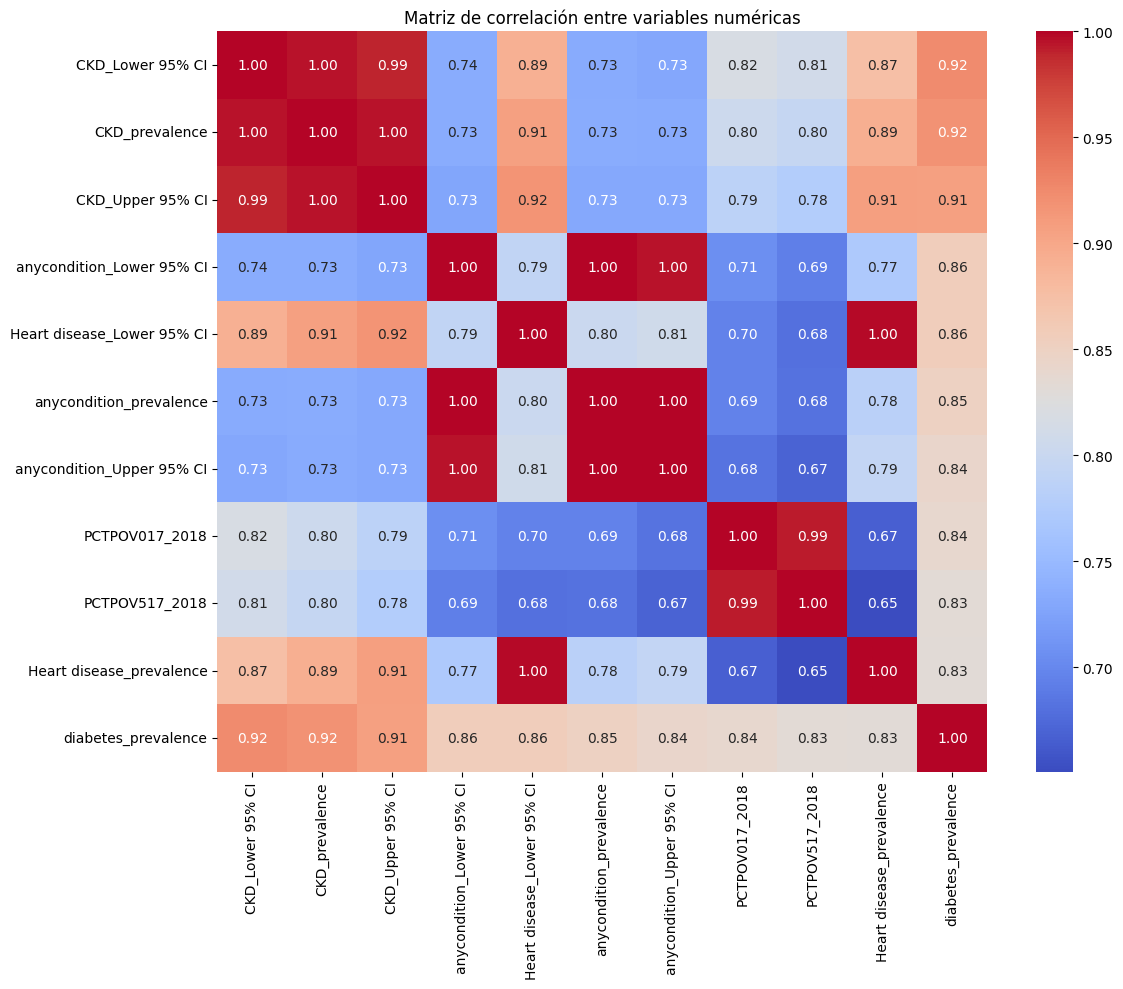

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables numéricas relevantes
columnas_numericas = [
    'CKD_Lower 95% CI',
    'CKD_prevalence',
    'CKD_Upper 95% CI',
    'anycondition_Lower 95% CI',
    'Heart disease_Lower 95% CI',
    'anycondition_prevalence',
    'anycondition_Upper 95% CI',
    'PCTPOV017_2018',
    'PCTPOV517_2018',
    'Heart disease_prevalence',
    'diabetes_prevalence'
]

# Matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(df[columnas_numericas].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.tight_layout()
plt.show()


las variables que eleji ya se veian su correlacion 

Valores atipicos 

In [64]:
df_model.describe()

,CKD_Lower 95% CI,CKD_prevalence,CKD_Upper 95% CI,anycondition_Lower 95% CI,Heart disease_Lower 95% CI,anycondition_prevalence,anycondition_Upper 95% CI,PCTPOV017_2018,PCTPOV517_2018,Heart disease_prevalence,diabetes_prevalence
count,3140.000000,3140.000000,3140.000000,3140.000000,3140.00000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,3.207516,3.446242,3.710478,44.658121,7.81207,46.793917,48.838694,21.106911,19.882962,8.607803,13.073503
std,0.527740,0.568059,0.613069,6.369783,1.60931,6.379448,6.382210,8.909328,8.778545,1.758587,2.724351
min,1.700000,1.800000,1.900000,20.600000,3.30000,22.000000,23.500000,0.000000,0.000000,3.500000,6.100000
25%,2.900000,3.100000,3.300000,40.800000,6.70000,42.900000,45.000000,14.500000,13.400000,7.400000,11.200000
50%,3.200000,3.400000,3.700000,45.000000,7.80000,47.200000,49.300000,20.100000,18.800000,8.600000,12.800000
75%,3.500000,3.800000,4.100000,48.900000,8.90000,51.000000,53.100000,26.300000,24.900000,9.800000,14.800000
max,5.800000,6.200000,6.600000,64.000000,13.90000,66.200000,68.200000,68.300000,66.500000,15.100000,25.600000


outliers CKD_lower 95%CI


In [65]:
enfer_renal_baja = df_model['CKD_Lower 95% CI'].describe()
enfer_renal_baja

count    3140.000000
mean        3.207516
std         0.527740
min         1.700000
25%         2.900000
50%         3.200000
75%         3.500000
max         5.800000
Name: CKD_Lower 95% CI, dtype: float64

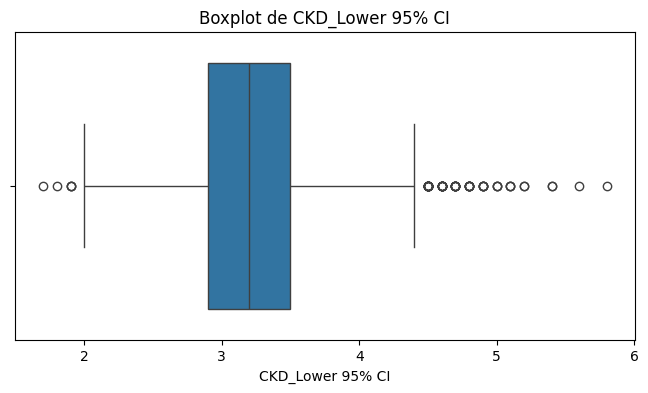

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.boxplot(x=df["CKD_Lower 95% CI"])
plt.title("Boxplot de CKD_Lower 95% CI")
plt.xlabel("CKD_Lower 95% CI")
plt.show()


In [67]:

q1 = df["CKD_Lower 95% CI"].quantile(0.25)
q3 = df["CKD_Lower 95% CI"].quantile(0.75)
iqr = q3 - q1


limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr


outliers = df[(df["CKD_Lower 95% CI"] < limite_inferior) | (df["CKD_Lower 95% CI"] > limite_superior)]

print(f"Número de valores atípicos: {outliers.shape[0]}")
print(outliers[["CKD_Lower 95% CI"]])


Número de valores atípicos: 68
      CKD_Lower 95% CI
17                 4.5
23                 4.5
31                 5.4
42                 4.7
52                 4.9
...                ...
2799               1.9
2824               1.8
2870               1.9
2921               4.8
3013               4.7

[68 rows x 1 columns]


Creo que son casos extremos, de personas y no errores 

outliers CKD_prevalence


In [68]:
enfer_renal_cro = df_model['CKD_prevalence'].describe()
enfer_renal_cro

count    3140.000000
mean        3.446242
std         0.568059
min         1.800000
25%         3.100000
50%         3.400000
75%         3.800000
max         6.200000
Name: CKD_prevalence, dtype: float64

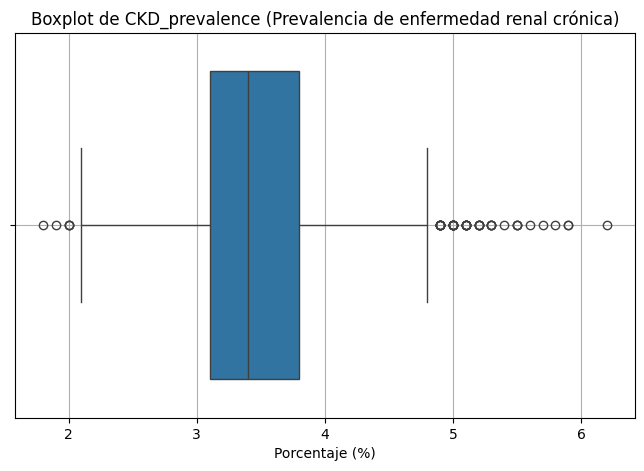

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 5))
sns.boxplot(x=df["CKD_prevalence"])
plt.title("Boxplot de CKD_prevalence (Prevalencia de enfermedad renal crónica)")
plt.xlabel("Porcentaje (%)")
plt.grid(True)
plt.show()


In [70]:

Q1 = df['CKD_prevalence'].quantile(0.25)
Q3 = df['CKD_prevalence'].quantile(0.75)
IQR = Q3 - Q1


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


outliers = df[(df['CKD_prevalence'] < limite_inferior) | (df['CKD_prevalence'] > limite_superior)]

print(f"Número de valores atípicos: {len(outliers)}")
display(outliers[['CKD_prevalence']])


Número de valores atípicos: 49


,CKD_prevalence
31,5.8
42,5.0
52,5.3
65,5.0
94,5.1
100,5.5
162,4.9
254,5.3
344,4.9
410,1.8


outliers CKD_Upper 95% CI	

In [71]:
enfer_renal_alta = df_model['CKD_Upper 95% CI'].describe()
enfer_renal_alta

count    3140.000000
mean        3.710478
std         0.613069
min         1.900000
25%         3.300000
50%         3.700000
75%         4.100000
max         6.600000
Name: CKD_Upper 95% CI, dtype: float64

In [72]:

Q1 = df['CKD_Upper 95% CI'].quantile(0.25)
Q3 = df['CKD_Upper 95% CI'].quantile(0.75)
IQR = Q3 - Q1


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


outliers = df[(df['CKD_Upper 95% CI'] < limite_inferior) | (df['CKD_Upper 95% CI'] > limite_superior)]

print(f"Número de valores atípicos: {len(outliers)}")
display(outliers[['CKD_Upper 95% CI']])


Número de valores atípicos: 41


,CKD_Upper 95% CI
31,6.2
42,5.3
52,5.6
65,5.3
94,5.4
100,6.0
254,5.7
344,5.3
377,5.3
410,1.9


outliers anycondition_Lower 95% CI	

In [73]:
enfer_condici_baja = df_model['anycondition_Lower 95% CI'].describe()
enfer_condici_baja

count    3140.000000
mean       44.658121
std         6.369783
min        20.600000
25%        40.800000
50%        45.000000
75%        48.900000
max        64.000000
Name: anycondition_Lower 95% CI, dtype: float64

In [74]:
q1 = df["anycondition_Lower 95% CI"].quantile(0.25)
q3 = df["anycondition_Lower 95% CI"].quantile(0.75)
iqr = q3 - q1


lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df["anycondition_Lower 95% CI"] < lower_bound) | (df["anycondition_Lower 95% CI"] > upper_bound)]

print(f"Número de valores atípicos: {len(outliers)}")
outliers[["anycondition_Lower 95% CI"]]


Número de valores atípicos: 45


,anycondition_Lower 95% CI
204,27.7
214,28.4
221,22.6
226,26.8
227,26.8
248,20.6
249,26.1
258,27.6
260,24.6
261,25.7


outliers Heart disease_Lower 95% CI

In [75]:
enfer_cardica_baja = df_model['Heart disease_Lower 95% CI'].describe()
enfer_cardica_baja

count    3140.00000
mean        7.81207
std         1.60931
min         3.30000
25%         6.70000
50%         7.80000
75%         8.90000
max        13.90000
Name: Heart disease_Lower 95% CI, dtype: float64

In [76]:
q1 = df["Heart disease_Lower 95% CI"].quantile(0.25)
q3 = df["Heart disease_Lower 95% CI"].quantile(0.75)
iqr = q3 - q1


lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr


outliers = df[(df["Heart disease_Lower 95% CI"] < lower_bound) | (df["Heart disease_Lower 95% CI"] > upper_bound)]

print(f"Número de valores atípicos: {len(outliers)}")
outliers[["Heart disease_Lower 95% CI"]]


Número de valores atípicos: 9


,Heart disease_Lower 95% CI
100,12.9
410,3.3
414,12.5
997,12.6
1109,12.6
1164,13.8
1271,12.3
1749,13.1
3013,13.9


outliers anycondition_prevalence

In [77]:
enfer_cronica = df_model['anycondition_prevalence'].describe()
enfer_cronica

count    3140.000000
mean       46.793917
std         6.379448
min        22.000000
25%        42.900000
50%        47.200000
75%        51.000000
max        66.200000
Name: anycondition_prevalence, dtype: float64

In [78]:
import pandas as pd


q1 = df["anycondition_prevalence"].quantile(0.25)
q3 = df["anycondition_prevalence"].quantile(0.75)
iqr = q3 - q1


lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr


outliers = df[(df["anycondition_prevalence"] < lower_bound) | (df["anycondition_prevalence"] > upper_bound)]

print(f"Número de valores atípicos: {len(outliers)}")
outliers[["anycondition_prevalence"]]


Número de valores atípicos: 48


,anycondition_prevalence
204,29.6
214,30.1
221,23.9
226,28.2
227,28.4
248,22.0
249,28.0
258,29.2
260,26.4
261,27.7


outliers anycondition_Upper 95% CI	

In [79]:
enfer_cronica_alta = df_model['anycondition_Upper 95% CI'].describe()
enfer_cronica_alta

count    3140.000000
mean       48.838694
std         6.382210
min        23.500000
25%        45.000000
50%        49.300000
75%        53.100000
max        68.200000
Name: anycondition_Upper 95% CI, dtype: float64

In [80]:
q1 = df["anycondition_Upper 95% CI"].quantile(0.25)
q3 = df["anycondition_Upper 95% CI"].quantile(0.75)
iqr = q3 - q1


lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr


outliers = df[(df["anycondition_Upper 95% CI"] < lower_bound) | (df["anycondition_Upper 95% CI"] > upper_bound)]

print(f"Número de valores atípicos: {len(outliers)}")
outliers[["anycondition_Upper 95% CI"]]


Número de valores atípicos: 53


,anycondition_Upper 95% CI
184,32.5
204,31.5
214,31.8
221,25.1
226,29.5
227,30.1
248,23.5
249,30.0
258,30.6
260,28.1


outliers PCTPOV017_2018


In [81]:
meno_pobr = df_model['PCTPOV017_2018'].describe()
meno_pobr

count    3140.000000
mean       21.106911
std         8.909328
min         0.000000
25%        14.500000
50%        20.100000
75%        26.300000
max        68.300000
Name: PCTPOV017_2018, dtype: float64

In [82]:
q1 = df["PCTPOV017_2018"].quantile(0.25)
q3 = df["PCTPOV017_2018"].quantile(0.75)
iqr = q3 - q1


lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr


outliers = df[(df["PCTPOV017_2018"] < lower_bound) | (df["PCTPOV017_2018"] > upper_bound)]

print(f"IQR: {iqr:.2f}")
print(f"Número de valores atípicos: {len(outliers)}")
outliers[["PCTPOV017_2018"]]


IQR: 11.80
Número de valores atípicos: 50


,PCTPOV017_2018
5,68.3
23,48.0
52,52.8
59,48.1
65,50.6
80,47.4
94,47.3
117,44.1
147,50.9
162,47.9


outliers PCTPOV517_2018


In [83]:
niños_pobr = df_model['PCTPOV517_2018'].describe()
niños_pobr

count    3140.000000
mean       19.882962
std         8.778545
min         0.000000
25%        13.400000
50%        18.800000
75%        24.900000
max        66.500000
Name: PCTPOV517_2018, dtype: float64

In [84]:
q1_pov517 = df["PCTPOV517_2018"].quantile(0.25)
q3_pov517 = df["PCTPOV517_2018"].quantile(0.75)
iqr_pov517 = q3_pov517 - q1_pov517

lower_bound_pov517 = q1_pov517 - 1.5 * iqr_pov517
upper_bound_pov517 = q3_pov517 + 1.5 * iqr_pov517

outliers_pov517 = df[(df["PCTPOV517_2018"] < lower_bound_pov517) | (df["PCTPOV517_2018"] > upper_bound_pov517)]

print(f"IQR para PCTPOV517_2018: {iqr_pov517:.2f}")
print(f"Número de valores atípicos en PCTPOV517_2018: {len(outliers_pov517)}")
display(outliers_pov517[["PCTPOV517_2018"]])

IQR para PCTPOV517_2018: 11.50
Número de valores atípicos en PCTPOV517_2018: 59


,PCTPOV517_2018
5,66.5
23,45.3
31,42.5
52,49.7
59,53.2
65,50.5
80,45.1
94,44.7
147,46.4
162,45.5


outliers Heart disease_prevalence	

In [85]:
enfe_card = df_model['Heart disease_prevalence'].describe()
enfe_card

count    3140.000000
mean        8.607803
std         1.758587
min         3.500000
25%         7.400000
50%         8.600000
75%         9.800000
max        15.100000
Name: Heart disease_prevalence, dtype: float64

In [86]:
import pandas as pd


q1_heart = df["Heart disease_prevalence"].quantile(0.25)
q3_heart = df["Heart disease_prevalence"].quantile(0.75)
iqr_heart = q3_heart - q1_heart

print(f"El Rango Intercuartílico (IQR) para Heart disease_prevalence es: {iqr_heart:.2f}")


lower_bound_heart = q1_heart - 1.5 * iqr_heart
upper_bound_heart = q3_heart + 1.5 * iqr_heart

print(f"Límite inferior para outliers: {lower_bound_heart:.2f}")
print(f"Límite superior para outliers: {upper_bound_heart:.2f}")


outliers_heart = df[(df["Heart disease_prevalence"] < lower_bound_heart) | (df["Heart disease_prevalence"] > upper_bound_heart)]
print(f"Número de posibles valores atípicos: {len(outliers_heart)}")


El Rango Intercuartílico (IQR) para Heart disease_prevalence es: 2.40
Límite inferior para outliers: 3.80
Límite superior para outliers: 13.40
Número de posibles valores atípicos: 13


outliers diabetes_prevalence

In [87]:
diabet = df_model['diabetes_prevalence'].describe()
diabet

count    3140.000000
mean       13.073503
std         2.724351
min         6.100000
25%        11.200000
50%        12.800000
75%        14.800000
max        25.600000
Name: diabetes_prevalence, dtype: float64

In [88]:



q1_diabetes = df["diabetes_prevalence"].quantile(0.25)
q3_diabetes = df["diabetes_prevalence"].quantile(0.75)
iqr_diabetes = q3_diabetes - q1_diabetes

print(f"El Rango Intercuartílico (IQR) para diabetes_prevalence es: {iqr_diabetes:.2f}")

lower_bound_diabetes = q1_diabetes - 1.5 * iqr_diabetes
upper_bound_diabetes = q3_diabetes + 1.5 * iqr_diabetes

print(f"Límite inferior para outliers: {lower_bound_diabetes:.2f}")
print(f"Límite superior para outliers: {upper_bound_diabetes:.2f}")


outliers_diabetes = df[(df["diabetes_prevalence"] < lower_bound_diabetes) | (df["diabetes_prevalence"] > upper_bound_diabetes)]
print(f"Número de posibles valores atípicos: {len(outliers_diabetes)}")


El Rango Intercuartílico (IQR) para diabetes_prevalence es: 3.60
Límite inferior para outliers: 5.80
Límite superior para outliers: 20.20
Número de posibles valores atípicos: 33


Valores faltanes 

In [89]:
print(df_model.isnull().sum())

CKD_Lower 95% CI              0
CKD_prevalence                0
CKD_Upper 95% CI              0
anycondition_Lower 95% CI     0
Heart disease_Lower 95% CI    0
anycondition_prevalence       0
anycondition_Upper 95% CI     0
PCTPOV017_2018                0
PCTPOV517_2018                0
Heart disease_prevalence      0
diabetes_prevalence           0
dtype: int64


Escalado de funciones

In [90]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

if not isinstance(df_model, pd.DataFrame):
    raise TypeError("La variable 'df_model' no es un DataFrame de pandas.")


variables_a_escalar_modelo = list(df_model.columns)  


scaler_model = StandardScaler()


df_model_escalado = pd.DataFrame(scaler_model.fit_transform(df_model), columns=df_model.columns)


print("Primeras filas del DataFrame escalado (df_model_escalado):")
print(df_model_escalado.head())


print("\nMedias después del escalado:")
print(df_model_escalado.mean())
print("\nDesviaciones estándar después del escalado:")
print(df_model_escalado.std())



Primeras filas del DataFrame escalado (df_model_escalado):
   CKD_Lower 95% CI  CKD_prevalence  CKD_Upper 95% CI  \
0         -0.582796       -0.609615         -0.669652   
1         -0.393279       -0.433549         -0.343373   
2          1.880929        1.855312          1.777443   
3         -0.203761       -0.257483         -0.180233   
4         -0.014244       -0.081417         -0.017093   

   anycondition_Lower 95% CI  Heart disease_Lower 95% CI  \
0                   0.116487                   -0.380391   
1                  -1.014030                   -0.504688   
2                   1.718052                    1.421910   
3                   0.775955                    0.054647   
4                  -0.056231                    0.365389   

   anycondition_prevalence  anycondition_Upper 95% CI  PCTPOV017_2018  \
0                 0.126376                   0.087963       -0.202843   
1                -1.033783                  -1.024682       -0.809046   
2                 

entrenamiento y prueba

In [91]:
from sklearn.model_selection import train_test_split

target_variable_escalado = 'diabetes_prevalence'
y_escalado = df_model_escalado[target_variable_escalado]


X_escalado = df_model_escalado.drop(columns=[target_variable_escalado])


X_train_escalado, X_test_escalado, y_train_escalado, y_test_escalado = train_test_split(
    X_escalado, y_escalado, test_size=0.2, random_state=42
)

print("Shape de X_train_escalado:", X_train_escalado.shape)
print("Shape de X_test_escalado:", X_test_escalado.shape)
print("Shape de y_train_escalado:", y_train_escalado.shape)
print("Shape de y_test_escalado:", y_test_escalado.shape)

Shape de X_train_escalado: (2512, 10)
Shape de X_test_escalado: (628, 10)
Shape de y_train_escalado: (2512,)
Shape de y_test_escalado: (628,)


Modelo de Regresión Lineal Base

In [92]:
linear_model = LinearRegression()
linear_model.fit(X_train_escalado, y_train_escalado)
y_pred_linear = linear_model.predict(X_test_escalado)
r2_linear = r2_score(y_test_escalado, y_pred_linear)
mse_linear = mean_squared_error(y_test_escalado, y_pred_linear)

print("Resultados del Modelo de Regresión Lineal Base:")
print(f"R²: {r2_linear:.4f}")
print(f"MSE: {mse_linear:.4f}")
print("-" * 30)

Resultados del Modelo de Regresión Lineal Base:
R²: 0.9399
MSE: 0.0651
------------------------------


Modelo Lasso

In [ ]:
alphas = np.linspace(0.1, 20, 100) 
r2_lasso_values = []

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha, random_state=42, max_iter=10000)
    lasso_model.fit(X_train_escalado, y_train_escalado)
    y_pred_lasso = lasso_model.predict(X_test_escalado)
    r2_lasso = r2_score(y_test_escalado, y_pred_lasso)
    r2_lasso_values.append(r2_lasso)


print("Resultados del Modelo Lasso (para diferentes valores de alpha):")
best_alpha_index = np.argmax(r2_lasso_values)
best_alpha_lasso = alphas[best_alpha_index]
best_r2_lasso = r2_lasso_values[best_alpha_index]
print(f"Mejor Alpha para Lasso: {best_alpha_lasso:.4f}")
print(f"Mejor R² para Lasso: {best_r2_lasso:.4f}")
print("-" * 30)
print("Comparación con Regresión Lineal Base:")
print(f"R² Regresión Lineal Base: {r2_linear:.4f}")
print(f"Mejor R² Lasso: {best_r2_lasso:.4f}")

Resultados del Modelo Lasso (para diferentes valores de alpha):
Mejor Alpha para Lasso: 0.1000
Mejor R² para Lasso: 0.9200
------------------------------
Comparación con Regresión Lineal Base:
R² Regresión Lineal Base: 0.9399
Mejor R² Lasso: 0.9200


evolución del R²

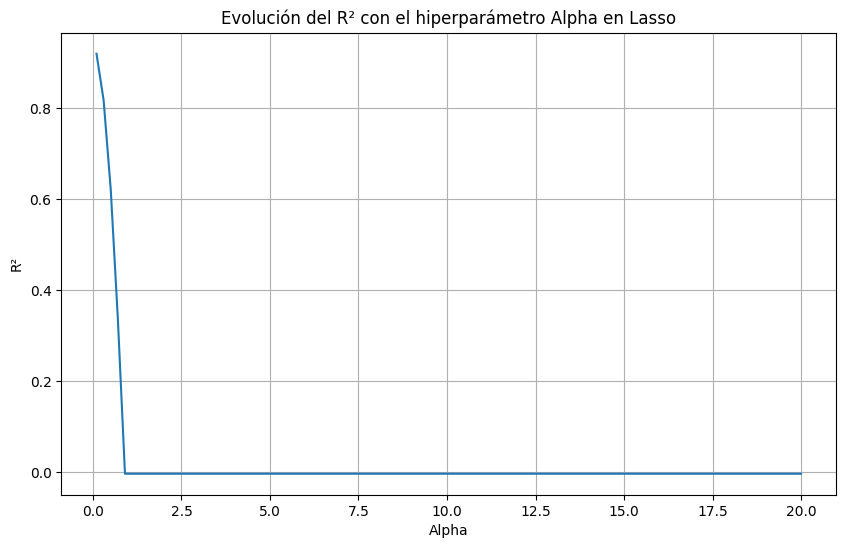

In [100]:
plt.figure(figsize=(10, 6))
plt.plot(alphas, r2_lasso_values)
plt.xlabel("Alpha")
plt.ylabel("R²")
plt.title("Evolución del R² con el hiperparámetro Alpha en Lasso")
plt.grid(True)
plt.show()